In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import seaborn as sns;
sns.set(color_codes = True)

In [2]:
data = pd.read_csv(r'C:\Users\tsubo\COVID-19 Data\covid_19_india.csv')
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# Convert Date column into datetime object
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%d")

data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
ex = np.unique(data['State/UnionTerritory'])
ex

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karanataka', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Madhya Pradesh***', 'Maharashtra',
       'Maharashtra***', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [5]:
def clean_stateName(stateName):
    if stateName == 'Telangana':
        stateName = 'Telangana'
    elif stateName == 'Telengana':
        stateName = 'Telangana'
    elif stateName == 'Bihar****':
        stateName = 'Bihar'
    elif stateName == 'Himanchal Pradesh':
        stateName = 'Himachal Pradesh'
    elif stateName == 'Karanataka':
        stateName = 'Karnataka'
    elif stateName == 'Madhya Pradesh***':
        stateName = 'Madhya Pradesh'
    elif stateName == 'Maharshtra***':
        stateName = 'Maharashtra'
    return stateName

In [6]:
data["State/UnionTerritory"] = data["State/UnionTerritory"].apply(lambda x: clean_stateName(x))
np.unique(df["State/UnionTerritory"])
# to identify all unique values in a column of dataframe or array

NameError: name 'df' is not defined

In [7]:
def daily_cases(dframe, stateColumn, dateColumn, cummColumn):
    dframe.sort_values(by = [stateColumn, dateColumn], inplace = True)
    newColName = 'daily_' + cummColumn
    dframe[newColName] = dframe[cummColumn].diff()
    #  diff is pandas method to caclucate difference between consecutive values
    mask = dframe[stateColumn] != dframe[stateColumn].shift(1)
    dframe[newColName][mask] = np.nan
    # where value of mask =True the cell value will be replaced by NaN
    dframe[newColName] = dframe[newColName].apply(lambda x: 0 if x < 0 else x)
    # replace negative values by 0
    # dframe.drop('diffs',axis=1, inplace = True)
    return dframe

In [8]:
df_new = daily_cases(dframe= data, stateColumn= 'State/UnionTerritory',dateColumn= 'Date', cummColumn= 'Confirmed')

C:\Users\tsubo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
df_new[502:507]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
18038,18039,2021-08-10,8:00 AM,Andaman and Nicobar Islands,-,-,7412,129,7546,0.0
18074,18075,2021-08-11,8:00 AM,Andaman and Nicobar Islands,-,-,7412,129,7548,2.0
121,122,2020-03-12,6:00 PM,Andhra Pradesh,1,0,0,0,1,NaN
134,135,2020-03-13,6:00 PM,Andhra Pradesh,1,0,0,0,1,0.0
147,148,2020-03-14,6:00 PM,Andhra Pradesh,1,0,0,0,1,0.0


In [10]:
# Preview Data
df_new[df_new["State/UnionTerritory"]=="Maharashtra"].tail(n=5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
17950,17951,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759,5539.0
17986,17987,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820,6061.0
18022,18023,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328,5508.0
18058,18059,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833,4505.0
18094,18095,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442,5609.0


#### 1. Find which state has the highest mean of daily confirmed cases since reported from January 2020

In [11]:
# Hint use Groupby state names to find their means for confirmed cases
df_group = df_new.groupby(['State/UnionTerritory'])['daily_Confirmed'].mean()

In [12]:
df_group = df_group.sort_values(ascending= False)[0:10]
df_group

State/UnionTerritory
Maharashtra       12260.976879
Kerala             6416.264758
Karnataka          5640.344231
Tamil Nadu         4940.860153
Andhra Pradesh     3839.808511
Uttar Pradesh      3265.908571
West Bengal        3003.909980
Delhi              2746.764706
Chhattisgarh       1967.362745
Odisha             1927.867446
Name: daily_Confirmed, dtype: float64

In [13]:
df_group.index

Index(['Maharashtra', 'Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh',
       'Uttar Pradesh', 'West Bengal', 'Delhi', 'Chhattisgarh', 'Odisha'],
      dtype='object', name='State/UnionTerritory')

Text(0, 0.5, 'Mean of Daily Confirmed Cases')

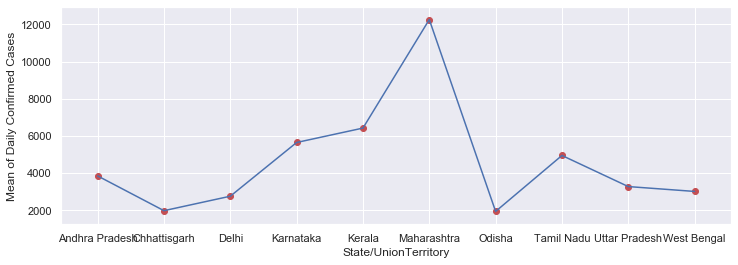

In [14]:
ax = sns.lineplot(x= df_group.index , y= df_group.values)
# df_group.values - extract only the values of a column
plt.scatter(x= df_group.index, y= df_group.values, c = 'r')
ax.figure.set_figwidth(12)
ax.figure.set_figheight(4)
ax.set_ylabel("Mean of Daily Confirmed Cases")

#### 2. Which state has the highest Death Rate for the month of June, July, and August

In [15]:
# Hint - explore how a datetime column of dataframe can be filtered using specific months as a list 
df_months = df_new['Date'].apply(lambda x: x.month in [6,7,8])
# this will create boolean basis comparison of months from a list

In [16]:
df_final = df_new[df_months]
# Filtered dataframe consisting of data from June, July & Aug

In [17]:
df_final.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed
17965,17966,2021-08-07,8:00 AM,West Bengal,-,-,1503535,18202,1532379,717.0
18001,18002,2021-08-08,8:00 AM,West Bengal,-,-,1504326,18217,1533128,749.0
18037,18038,2021-08-09,8:00 AM,West Bengal,-,-,1505089,18229,1533803,675.0
18073,18074,2021-08-10,8:00 AM,West Bengal,-,-,1505808,18240,1534360,557.0
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,639.0


In [18]:
df_final['death_rate'] = df_final['Deaths'] / df_final['Confirmed'] *100

C:\Users\tsubo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_final.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,daily_Confirmed,death_rate
17965,17966,2021-08-07,8:00 AM,West Bengal,-,-,1503535,18202,1532379,717.0,1.187826
18001,18002,2021-08-08,8:00 AM,West Bengal,-,-,1504326,18217,1533128,749.0,1.188224
18037,18038,2021-08-09,8:00 AM,West Bengal,-,-,1505089,18229,1533803,675.0,1.188484
18073,18074,2021-08-10,8:00 AM,West Bengal,-,-,1505808,18240,1534360,557.0,1.188769
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,639.0,1.189056


In [20]:
df_groups_deaths = df_final.groupby(["State/UnionTerritory"])['death_rate'].mean()

In [21]:
top_10_deathrates = df_groups_deaths.sort_values(ascending= False)[0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

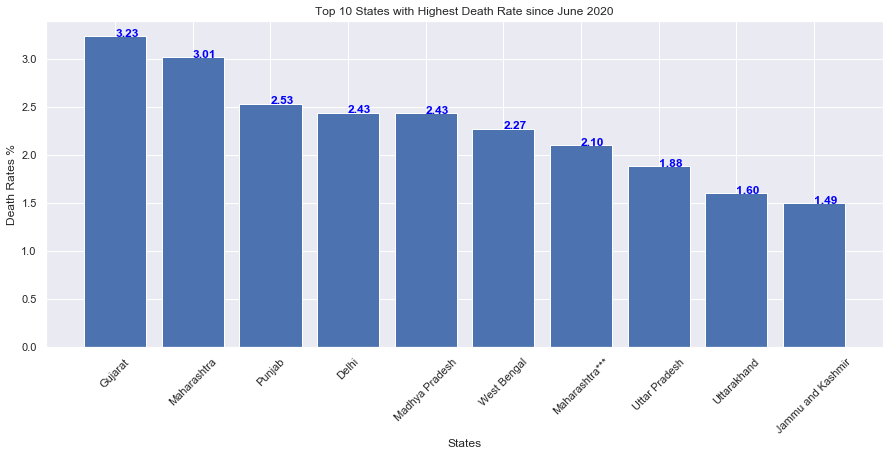

In [22]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(x = top_10_deathrates.index, height =  top_10_deathrates.values)
ax.set_xlabel('States')
ax.set_ylabel('Death Rates %')
ax.set_title('Top 10 States with Highest Death Rate since June 2020')
for i, v in enumerate(top_10_deathrates.values):
    ax.text(i, v, s = ("%.2f" % v), color='blue', fontweight='bold', fontsize = 12)
# %.2f will print decimals upto 2 places
plt.xticks(rotation=45)
# this line will rotate the x axis label in 45 degrees to make it more readable

#### 3. Explore Trend in Confirmed Cases for the state of Maharashtra

In [23]:
df_Maharashtra = df_new[df_new["State/UnionTerritory"]=='Maharashtra']

C:\Users\tsubo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


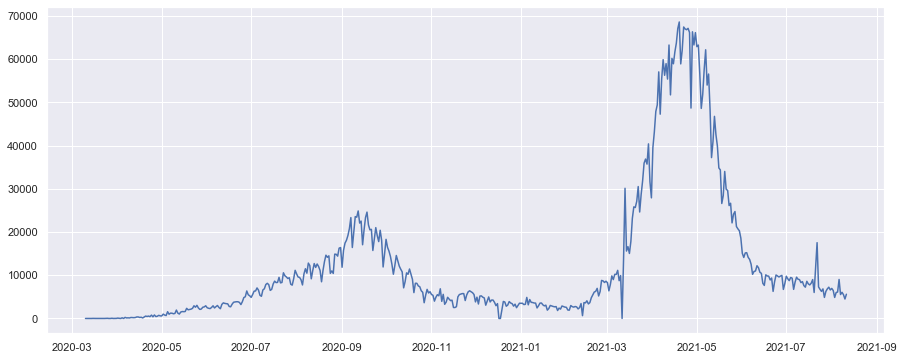

In [24]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.plot(df_Maharashtra["Date"],df_Maharashtra["daily_Confirmed"])

Text(0.5, 1.0, 'Death Rate in Maharastra')

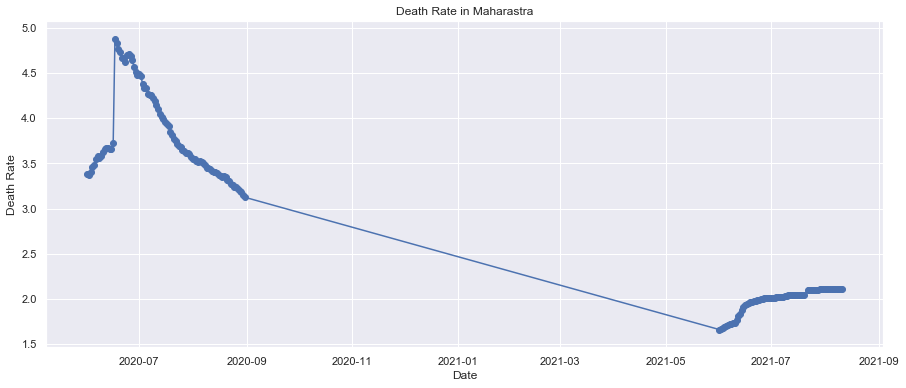

In [25]:
df_Maharashtra = df_final[df_final["State/UnionTerritory"]=='Maharashtra']
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.plot(df_Maharashtra["Date"],df_Maharashtra["death_rate"])
ax.scatter(df_Maharashtra["Date"],df_Maharashtra["death_rate"])
ax.set_xlabel('Date')
ax.set_ylabel('Death Rate')
ax.set_title('Death Rate in Maharastra')

In [26]:
data['Confirmed'] =  data['ConfirmedIndianNational'] + data['ConfirmedForeignNational']
data.drop('ConfirmedIndianNational',axis = 1,inplace=True)
data.drop('ConfirmedForeignNational',axis = 1,inplace=True)
data.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,daily_Confirmed
365,366,2020-03-26,6:00 PM,Andaman and Nicobar Islands,0,0,10,NaN
392,393,2020-03-27,10:00 AM,Andaman and Nicobar Islands,0,0,10,0.0
420,421,2020-03-28,6:00 PM,Andaman and Nicobar Islands,0,0,60,5.0
447,448,2020-03-29,7:30 PM,Andaman and Nicobar Islands,0,0,--,3.0
474,475,2020-03-30,9:30 PM,Andaman and Nicobar Islands,0,0,--,0.0


In [27]:
data.shape

(18110, 8)

In [28]:
new_data = data[data['Date']== '28/03/20'].reset_index()
new_data

,index,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,daily_Confirmed
0,420,421,2020-03-28,6:00 PM,Andaman and Nicobar Islands,0,0,60,5.0
1,419,420,2020-03-28,6:00 PM,Andhra Pradesh,1,0,140,2.0
2,421,422,2020-03-28,6:00 PM,Bihar,0,1,90,3.0
3,422,423,2020-03-28,6:00 PM,Chandigarh,0,0,80,1.0
4,423,424,2020-03-28,6:00 PM,Chhattisgarh,0,0,60,0.0
5,424,425,2020-03-28,6:00 PM,Delhi,6,1,381,3.0
6,425,426,2020-03-28,6:00 PM,Goa,0,0,30,0.0
7,426,427,2020-03-28,6:00 PM,Gujarat,0,3,441,2.0
8,427,428,2020-03-28,6:00 PM,Haryana,12,0,1914,3.0
9,428,429,2020-03-28,6:00 PM,Himachal Pradesh,0,1,30,0.0


In [29]:
### Checking Data Types
for col in data.columns.tolist():
    weird = (data[[col]].applymap(type) != data[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (data[weird]) > 0:
        print (col)

In [30]:
data.isnull().sum()

Sno                      0
Date                     0
Time                     0
State/UnionTerritory     0
Cured                    0
Deaths                   0
Confirmed                0
daily_Confirmed         41
dtype: int64

In [31]:
data[data.duplicated()]

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,daily_Confirmed


In [32]:
data['State/UnionTerritory'].value_counts()

Kerala                                      560
Telangana                                   528
Delhi                                       528
Rajasthan                                   527
Haryana                                     526
Uttar Pradesh                               526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Karnataka                                   521
Jammu and Kashmir                           521
Maharashtra                                 520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                        